
# Will Wolz
# NN for ML Take Home Final

# AML Problem 1.4


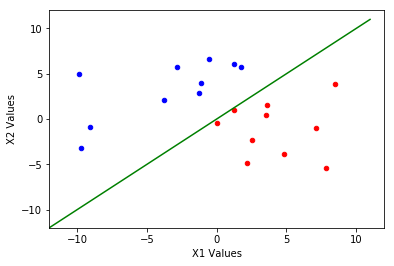

In [67]:
import random
import numpy as np
from math import fabs
import matplotlib.pyplot as pyp
# A 

# Generating a random dataset of size 20
Y = [None]*20
X = [None]*20
for i in range(len(X)):
    X[i] = [random.uniform(-10,10), random.uniform(-10,10)]

for i in range(len(X)):
        if (X[i][0] > X[i][1]):
            Y[i] = 1
        else:
            Y[i] = -1
            
#Plotting the target function, y = x

axes = pyp.gca()
axes.set_xlim([-12,12])
axes.set_ylim([-12,12])
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
wlx = np.array(range(-12, 12))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
pyp.show()

In [68]:
# Perceptron Algorithm Class

class Perceptron(object):
    def __init__(self, nocovars, lrnrate = 1, iterations = 10000):   # Will try with other iteration limits
        self._lr = lrnrate 
        self._iterations = iterations # In case data is not linearly separable so algorithm will complete
        self._W = np.zeros(nocovars + 1) # Add one weight for bias
        for i in range(len(self._W)):
            self._W[i] = random.uniform(-1,1)

    def activation(self, X): #Good
        if X > 0:
            return 1
        else:
            return -1

    def predict(self, X): #Good
        prod = self._W.T.dot(X) # or just return self.activation(self._W.T.dot(X))
        return self.activation(prod)
    
    def checkall(self, X, Y):
        for i in range(len(X)):
            Xb = np.insert(X[i], 0, 1) # Add a x^0 term for the bias
            if self.predict(Xb) != Y[i]:
                return i
        return (len(X)*10)

    def train(self, X, Y): # Need to change, first cycle through and test the y and w*x for misclass, then update on
        # that point, increase iteration counter, and move to the next point! 
        # Please train before you test!!
        i = 0
        while i < self._iterations:
            check = self.checkall(X, Y)
            if check > len(X):
                print("Converged, iterations = ", i)
                return self._W
            else:
                Xb = np.insert(X[check], 0, 1)
                err = Y[check] - self.predict(Xb)
                self._W = self._W + self._lr*err*Xb
            i += 1
        print("All", i, "iterations used.")
        return self._W 

    def get_eqn(self, X, Y):
        equn = "Y_hat ="
        for i in range(len(self._W)):
            equn += str(self._W[i])
            if i != 0:
                equn += "X"
                equn += str(i)
            if i + 1 != len(self._W):
                equn += str(" + ")
        print(equn)
        

Converged, iterations =  4
[ 4.34073243  7.32518343 -7.35185489]


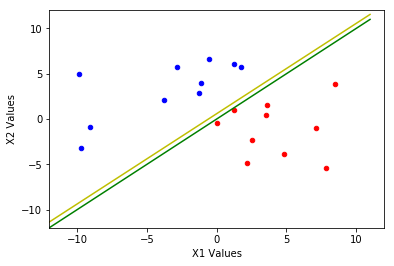

In [69]:
# B 

np.asarray(X)
p = Perceptron(nocovars = 2)
p.train(X, Y)
print(p._W)


axes = pyp.gca()
axes.set_xlim([-12,12])
axes.set_ylim([-12,12])
# Plot points by color
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
# Plot the target function, y = x
wlx = np.array(range(-12, 12))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-p._W[1]*wlx - p._W[0]) / p._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

We can see that it only took 4 iterations to converge. The green line above is the target function, and the yellow line is the chosen hypothesis. We can see that they are nearly parallel, but our Perceptron did not find the exact target function boundary.

Converged, iterations =  9
[  1.30353437  21.93549144 -21.97320532]


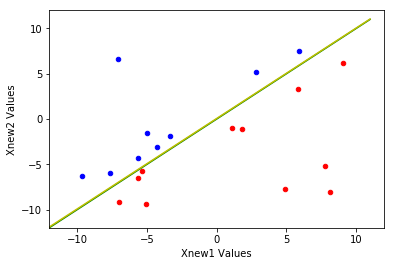

In [72]:
# C 

# Generating ANOTHER random dataset of size 20
Ynew = [None]*20
Xnew = [None]*20
for i in range(len(Xnew)):
    Xnew[i] = [random.uniform(-10,10), random.uniform(-10,10)]

for i in range(len(Xnew)):
        if (Xnew[i][0] > Xnew[i][1]):
            Ynew[i] = 1
        else:
            Ynew[i] = -1

            
np.asarray(Xnew)
pnew = Perceptron(nocovars = 2)
pnew.train(Xnew, Ynew)
print(pnew._W)


axes = pyp.gca()
axes.set_xlim([-12,12])
axes.set_ylim([-12,12])
# Plot points by color
for i in range(len(Ynew)):
    if Ynew[i] == 1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'r.', markersize  = 9)
    elif Ynew[i] == -1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'b.', markersize  = 9)
pyp.ylabel("Xnew2 Values")
pyp.xlabel("Xnew1 Values")
# Plot the target function, y = x
wlx = np.array(range(-12, 12))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

If we compare our new attempt to the previous, we see that the target function boundary and our learned boundary are nearly the same. We can see that a lot of our data is very close to the target function, so it makes sense that the algorithm would find a better solution than if the points were spaced very far away from the true decision boundary. It converged slower, taking 9 iterations.

Converged, iterations =  70
[-111.71558662  334.51860588 -378.84232331]


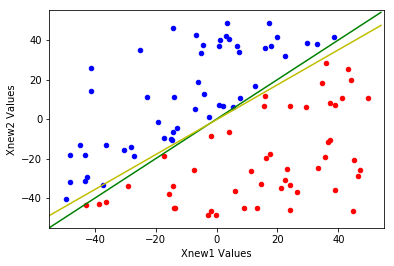

In [73]:
# D
N = 100
# Generating a random dataset of size 100
Ynew = [None]*N
Xnew = [None]*N
for i in range(len(Xnew)):
    Xnew[i] = [random.uniform(-(N/2),N/2), random.uniform(-(N/2),N/2)]

for i in range(len(Xnew)):
        if (Xnew[i][0] > Xnew[i][1]):
            Ynew[i] = 1
        else:
            Ynew[i] = -1

            
np.asarray(Xnew)
pnew = Perceptron(nocovars = 2)
pnew.train(Xnew, Ynew)
print(pnew._W)


axes = pyp.gca()
axes.set_xlim([-55,55])
axes.set_ylim([-55,55])
# Plot points by color
for i in range(len(Ynew)):
    if Ynew[i] == 1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'r.', markersize  = 9)
    elif Ynew[i] == -1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'b.', markersize  = 9)
pyp.ylabel("Xnew2 Values")
pyp.xlabel("Xnew1 Values")
# Plot the target function, y = x
wlx = np.array(range(-(N+5), (N+5))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

We can see again that our PLA has converged, this time taking 70 iterations. We expanded the random data to be sampled from a Uniform (-50, 50) for both X1 and X2 values (compared to U(-10, 10) for the 20 examples) to allow for a larger space. 
We can see that our boundary has strayed farther from the true boundary, which makes sense with a much larger sample size. It is still a fairly accurate representation of the true line and does classify all points here correctly, although there exist points which it would misclassify. We can confirm this line being worse approximation than our others because the slope is farther from 1.

Converged, iterations =  1346
[ -151.6135092   1769.46510438 -1770.11278179]


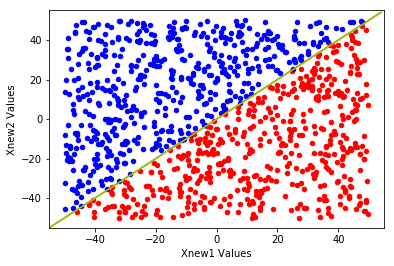

In [76]:
# E 

N = 1000
# Generating a random dataset of size 1000
Ynew = [None]*N
Xnew = [None]*N
for i in range(len(Xnew)):
    Xnew[i] = [random.uniform(-50,50), random.uniform(-50,50)]

for i in range(len(Xnew)):
        if (Xnew[i][0] > Xnew[i][1]):
            Ynew[i] = 1
        else:
            Ynew[i] = -1

            
np.asarray(Xnew)
pnew = Perceptron(nocovars = 2)
pnew.train(Xnew, Ynew)
print(pnew._W)


axes = pyp.gca()
axes.set_xlim([-55,55])
axes.set_ylim([-55,55])
# Plot points by color
for i in range(len(Ynew)):
    if Ynew[i] == 1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'r.', markersize  = 9)
    elif Ynew[i] == -1:
        pyp.plot(Xnew[i][0], Xnew[i][1], 'b.', markersize  = 9)
pyp.ylabel("Xnew2 Values")
pyp.xlabel("Xnew1 Values")
# Plot the target function, y = x
wlx = np.array(range(-55, 55))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

Keeping our X's in the U(-50, 50) range was interesting for this run, we got nearly a perfect learned boundary with slope of 1, and we can see that our points are again divided perfectly. This took 1346 iterations to converge, 19 times longer than the 100 data point set, while only having 10 times more points.

In [4]:
# F

# Now we create X in R^10 instead of R^2 
N = 1000

Ynew = [None]*N
Xnew = [None]*N
for i in range(len(Xnew)):
    Xnew[i] = [random.uniform(-500,500), random.uniform(-500,500), random.uniform(-500,500), 
              random.uniform(-500,500), random.uniform(-500,500), random.uniform(-500,500), 
              random.uniform(-500,500), random.uniform(-500,500), random.uniform(-500,500), random.uniform(-500,500)]

for i in range(len(Xnew)):
        if (Xnew[i][0] > Xnew[i][1]):
            Ynew[i] = 1
        else:
            Ynew[i] = -1

            
np.asarray(Xnew)
pnew = Perceptron(nocovars = 10)
pnew.train(Xnew, Ynew)
print(pnew._W)

[-1.76524014e+03  6.87418916e+04 -6.94288489e+04 -2.22843169e+02
  2.71532432e+02  4.83311926e+02  1.93177868e+01 -9.86133343e+01
 -7.87856697e+02  6.89157947e+02  3.87378922e+02]


The algorithm converged in 1902 iterations, taking longer than our previous N = 1000 attempt with d = 2

In [ ]:
# G 

import random
import numpy as np
from math import fabs
import matplotlib.pyplot as pyp
# We modify our PLA to now return the iter count once it has finished instead of the weights for this section.

# Perceptron Algorithm Class

class Perceptron(object):
    def __init__(self, nocovars, lrnrate = 1, iterations = 10000):   # Will try with other iteration limits
        self._lr = lrnrate 
        self._iterations = iterations # In case data is not linearly separable so algorithm will complete
        self._W = np.zeros(nocovars + 1) # Add one weight for bias
        for i in range(len(self._W)):
            self._W[i] = random.uniform(-1,1)

    def activation(self, X): #Good
        if X > 0:
            return 1
        else:
            return -1
        
    def predict(self, X): #Good
        prod = self._W.T.dot(X) # or just return self.activation(self._W.T.dot(X))
        return self.activation(prod)
    
    def checkall(self, X, Y):
        for i in range(len(X)):
            Xb = np.insert(X[i], 0, 1) # Add a x^0 term for the bias
            if self.predict(Xb) != Y[i]:
                return i
        return (len(X)*10)

    def train(self, X, Y): 
        i = 0
        while i < self._iterations:
            check = self.checkall(X, Y)
            if check > len(X):
                return i
            else:
                Xb = np.insert(X[check], 0, 1)
                err = Y[check] - self.predict(Xb)
                self._W = self._W + self._lr*err*Xb
            i += 1
        return i


iterarr = [None]*100

for i in range(100):
    if (i%10) == 0:
        print(i)
    pnew = Perceptron(nocovars = 10)
    iterarr[i] = pnew.train(Xnew, Ynew)
print("Done")

In [ ]:
# Histogram Plot

Unfortunately the above simulation will not end on my computer, I do not think it shoud be getting stuck anywhere but can't seem to find an error if there is one.

I tried to edit my PLA to return the iter count instead of the weights for ease of input to the histogram but it did not seem to work/the input size is too big.

# AML Problem 1.5 #


In [122]:
# UPDATED Perceptron Class

class Perceptron(object):
    def __init__(self, nocovars, lrnrate = 1, iterations = 1000):   # Will try with other iteration limits
        self._lr = lrnrate 
        self._iterations = iterations # In case data is not linearly separable so algorithm will complete
        self._W = np.zeros(nocovars + 1) # Add one weight for bias
        for i in range(len(self._W)):
            self._W[i] = random.uniform(-1,1)

    def activation(self, X): #Good
        if X > 0:
            return 1
        else:
            return -1

    def predict(self, X): #Good
        prod = self._W.T.dot(X) # or just return self.activation(self._W.T.dot(X))
        return self.activation(prod)

    def train(self, X, Y): # Need to change, first cycle through and test the y and w*x for misclass, then update on
        # that point, increase iteration counter, and move to the next point! 
        # Please train before you test!!
        i = 0
        while i < self._iterations:
            # Sample 1 randomly from X
            point = random.randint(0, len(X)-1)
            Xb = np.insert(X[point], 0, 1)
            if Y[point]*self.predict(Xb) <= 1:
                self._W = self._W + self._lr*(Y[point] - self.predict(Xb))*Xb
            i += 1
                
    def get_eqn(self, X, Y):
        equn = "Y_hat ="
        for i in range(len(self._W)):
            equn += str(self._W[i])
            if i != 0:
                equn += "X"
                equn += str(i)
            if i + 1 != len(self._W):
                equn += str(" + ")
        print(equn)
        
    def getError(self, X, Y):
        totalerror = 0.0
        for i in range(len(X)):
            Xb = np.insert(X[i], 0, 1)
            if (self.predict(Xb) - Y[i]) != 0:
                totalerror += 1
        return totalerror/len(X)

In [123]:
# A 

N = 100
# Generating a random dataset of size 100
Y = [None]*N
X = [None]*N
for i in range(len(X)):
    X[i] = [random.uniform(-500,500), random.uniform(-500, 500)]
    if (X[i][0] > X[i][1]):
        Y[i] = 1
    else:
        Y[i] = -1

            
np.asarray(X)
pnew = Perceptron(nocovars = 2, lrnrate = 100)
pnew.train(X, Y)


N = 10000
# Generating a random test dataset of size 10000
Ynew = [None]*N
Xnew = [None]*N
for i in range(len(Xnew)):
    Xnew[i] = [random.uniform(-500,500), random.uniform(-500, 500)]
    if (Xnew[i][0] > Xnew[i][1]):
        Ynew[i] = 1
    else:
        Ynew[i] = -1

print("Total test error  = ", pnew.getError(Xnew, Ynew))

Total test error  =  0.016


[-4.27928114e-01  1.43404350e+05 -1.52970509e+05]


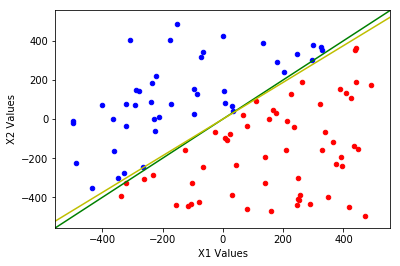

In [124]:
print(pnew._W)
axes = pyp.gca()
axes.set_xlim([-555,555])
axes.set_ylim([-555,555])
# Plot points by color
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
    
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
# Plot the target function, y = x
wlx = np.array(range(-555, 555))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

Using a learning rate of 100, we get an error rate of 1.6%. We are taking 1000 iterations every run.

Total test error  =  0.0177
[  -12.44340083  1498.04019342 -1608.02312191]


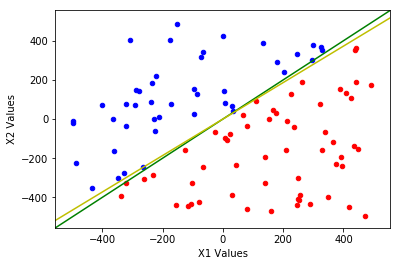

In [125]:
# B
# Now we change the learning rate to 1 and repeat.

pnew = Perceptron(nocovars = 2, lrnrate = 1)
pnew.train(X, Y)
print("Total test error  = ", pnew.getError(Xnew, Ynew))
print(pnew._W)
axes = pyp.gca()
axes.set_xlim([-555,555])
axes.set_ylim([-555,555])
# Plot points by color
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
    
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
# Plot the target function, y = x
wlx = np.array(range(-555, 555))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

We get a very similar error of 1.77%. Changing the learning rate from 100 to 1 did not seem to change our result too drastically.

Total test error  =  0.0042
[  0.16673777  19.07458081 -19.3972579 ]


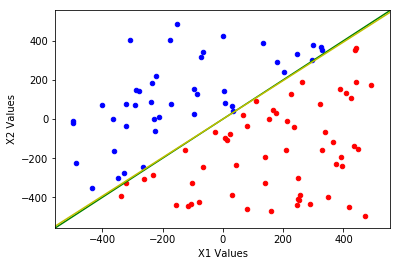

In [126]:
# C
# Learning rate = 0.01

pnew = Perceptron(nocovars = 2, lrnrate = 0.01)
pnew.train(X, Y)
print("Total test error  = ", pnew.getError(Xnew, Ynew))
print(pnew._W)
axes = pyp.gca()
axes.set_xlim([-555,555])
axes.set_ylim([-555,555])
# Plot points by color
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
    
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
# Plot the target function, y = x
wlx = np.array(range(-555, 555))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

The error this time is smaller than any previous at .42%, the smaller learning rate may have helped by not overstepping when changing the weights. Our boundary is nearly equal to the original boundary both in slope and intercept.

Total test error  =  0.0016
[ 0.2065887   0.16048243 -0.16159588]


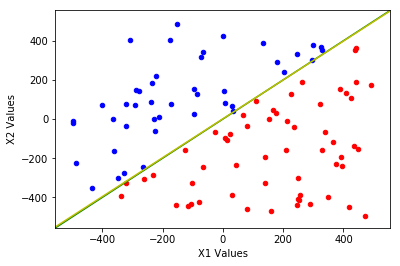

In [127]:
# D
# Learning rate = 0.0001

pnew = Perceptron(nocovars = 2, lrnrate = 0.0001)
pnew.train(X, Y)
print("Total test error  = ", pnew.getError(Xnew, Ynew))
print(pnew._W)
axes = pyp.gca()
axes.set_xlim([-555,555])
axes.set_ylim([-555,555])
# Plot points by color
for i in range(len(Y)):
    if Y[i] == 1:
        pyp.plot(X[i][0], X[i][1], 'r.', markersize  = 9)
    elif Y[i] == -1:
        pyp.plot(X[i][0], X[i][1], 'b.', markersize  = 9)
    
pyp.ylabel("X2 Values")
pyp.xlabel("X1 Values")
# Plot the target function, y = x
wlx = np.array(range(-555, 555))
target = eval('wlx')
pyp.plot(wlx, target, 'g')
# Plot the best Weights found
wly = eval('(-pnew._W[1]*wlx - pnew._W[0]) / pnew._W[2]')
pyp.plot(wlx, wly, 'y')
pyp.show()

E) 
The error is now .16%, the smallest of any of the values we have seen in our tests. The smaller learning rate is likely helping to fine tune the update steps, allowing our weights to approach the true values instead of potentially overstepping them due to a larger learning rate. Our boundary is nearly identical to the true boundary.